In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import time
import pandas as pd
from pprint import pprint as pp
from inspect import signature
from datetime import datetime
import warnings
warnings.filterwarnings(action = 'ignore')
%config InlineBackend.figure_format = 'retina'
import platform
import sys
import numpy as np
import missingno as msno
import matplotlib.font_manager as fm
from matplotlib import rc
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

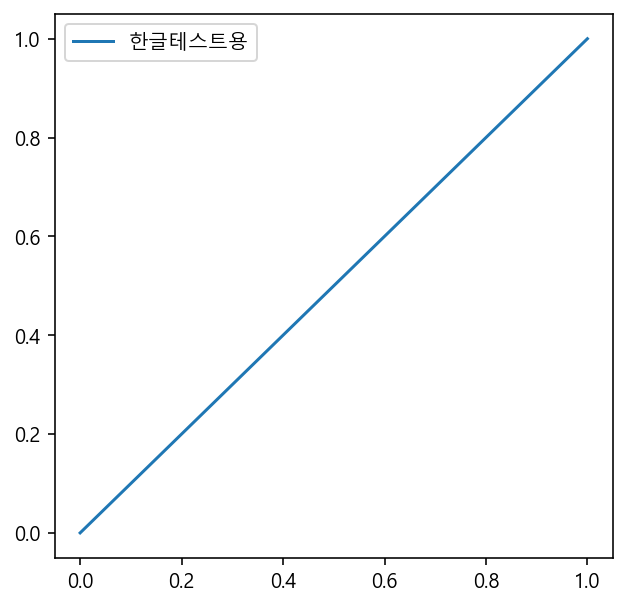

In [46]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [47]:
train= pd.read_csv('./data/train.csv')
quality=pd.read_csv('./data/sample_submission.csv')
test = pd.read_csv('./data/test.csv')
print(train.shape)
train.head()

(5497, 14)


,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [49]:
train['quality'].unique()

array([5, 6, 7, 8, 4, 3, 9], dtype=int64)

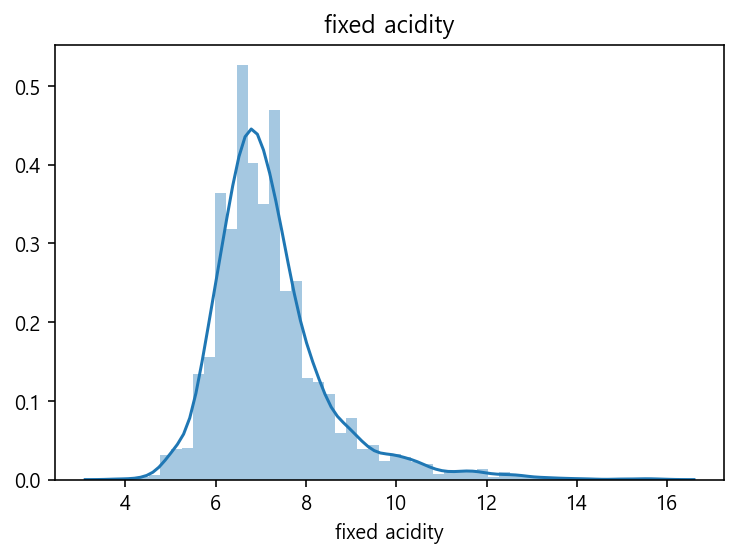

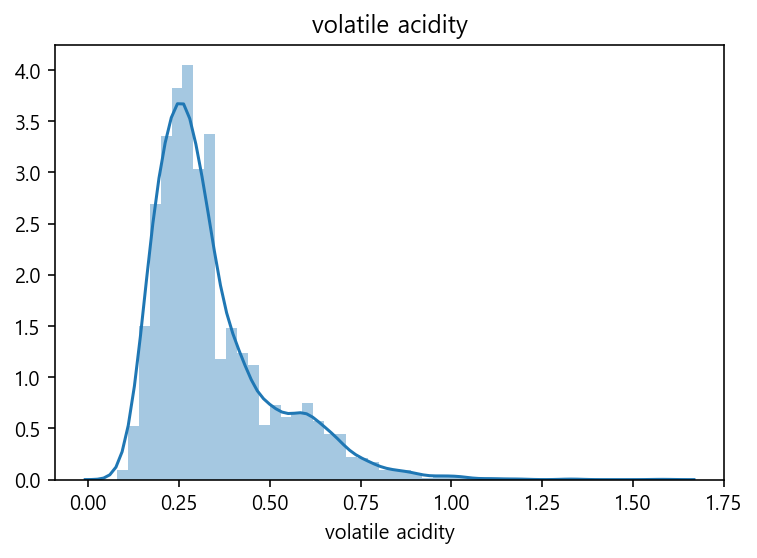

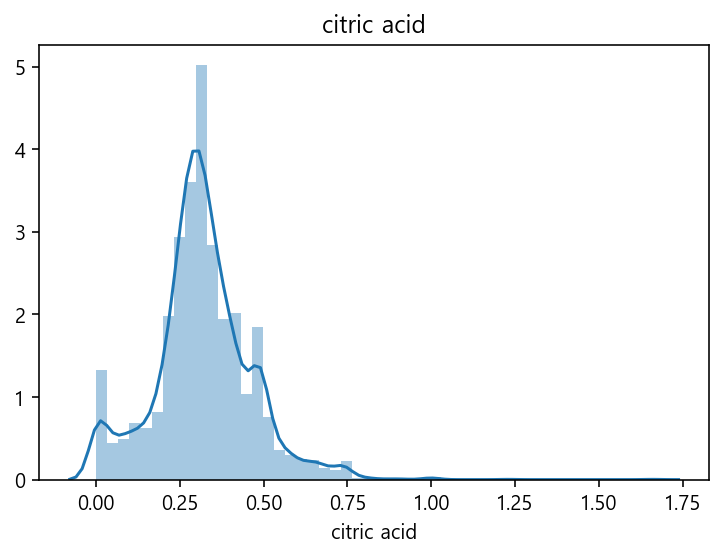

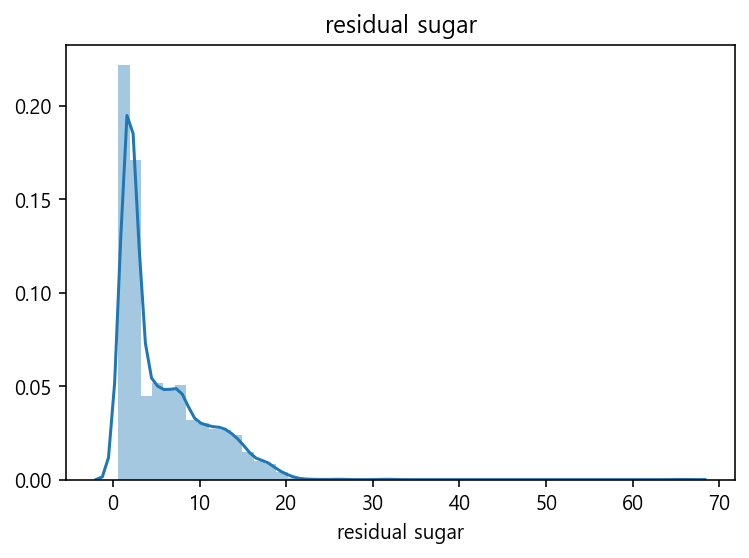

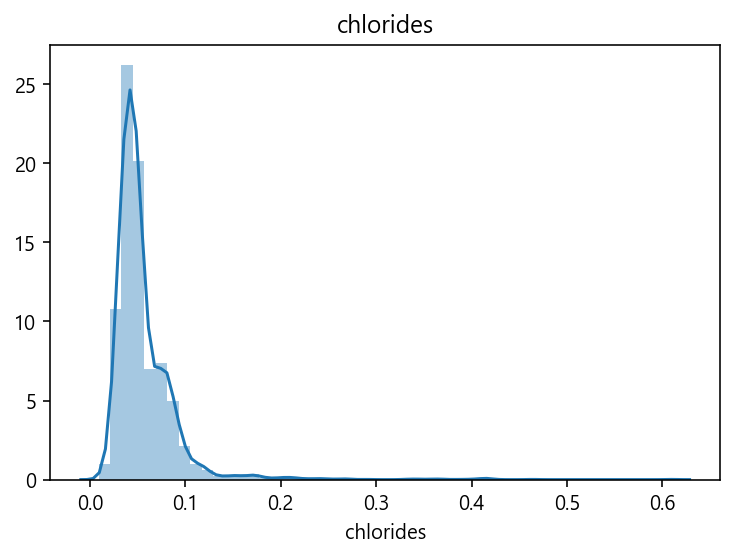

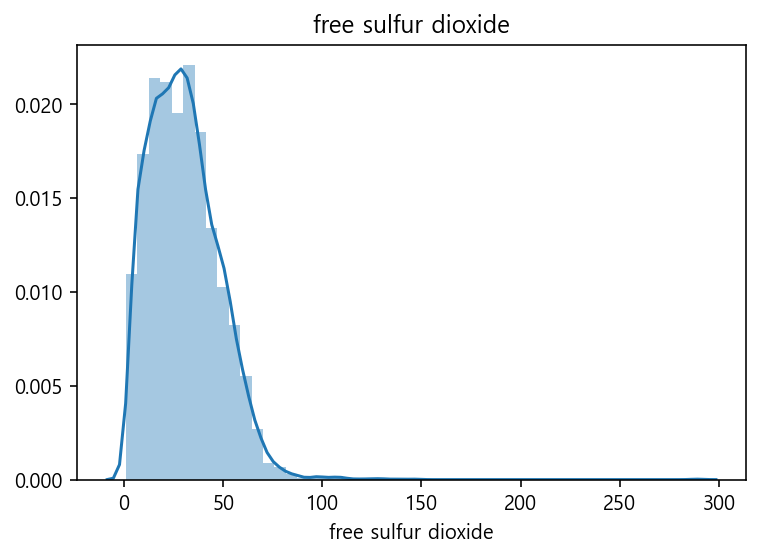

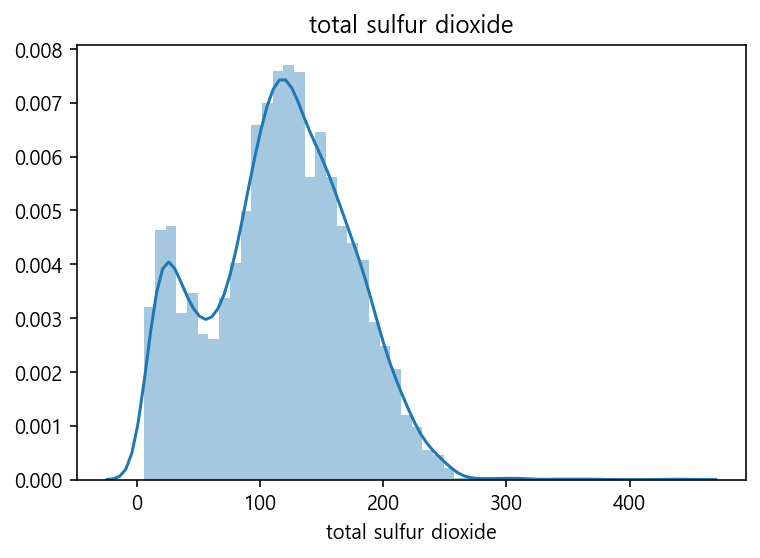

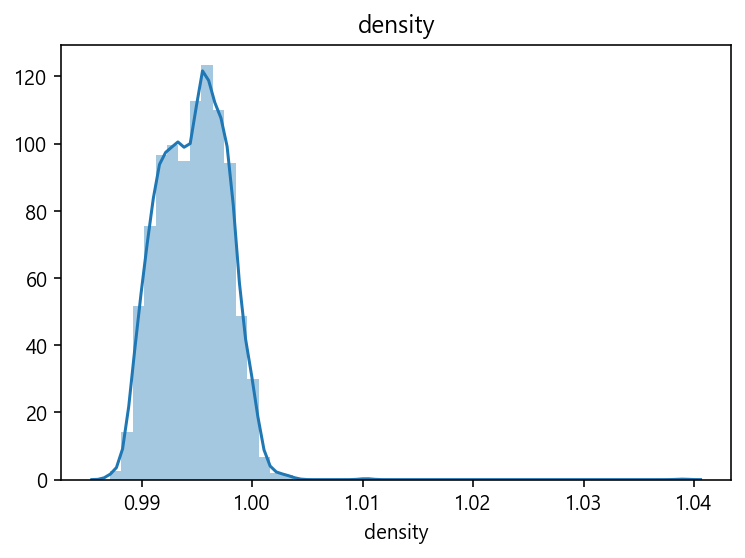

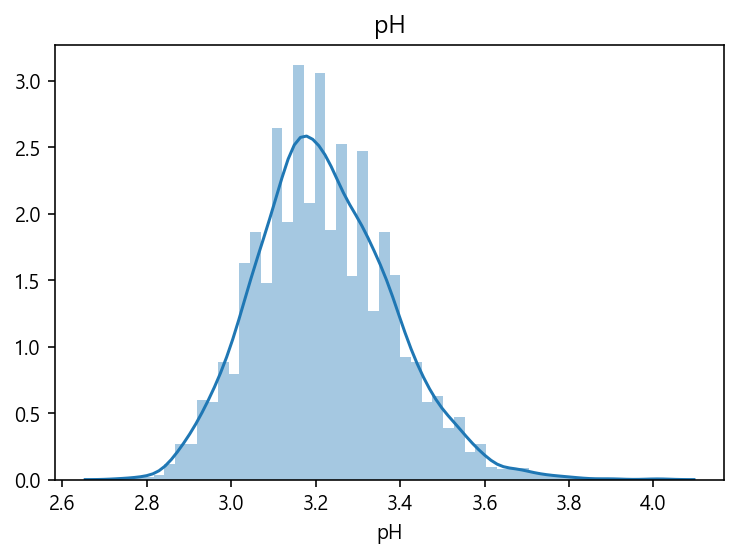

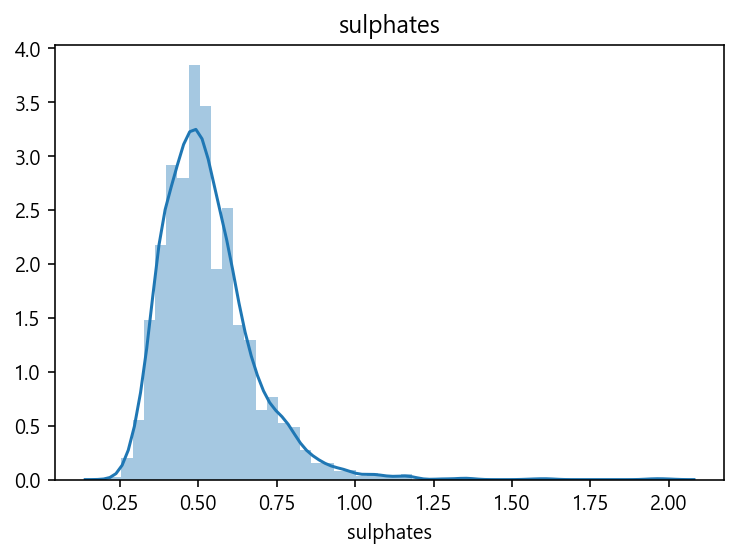

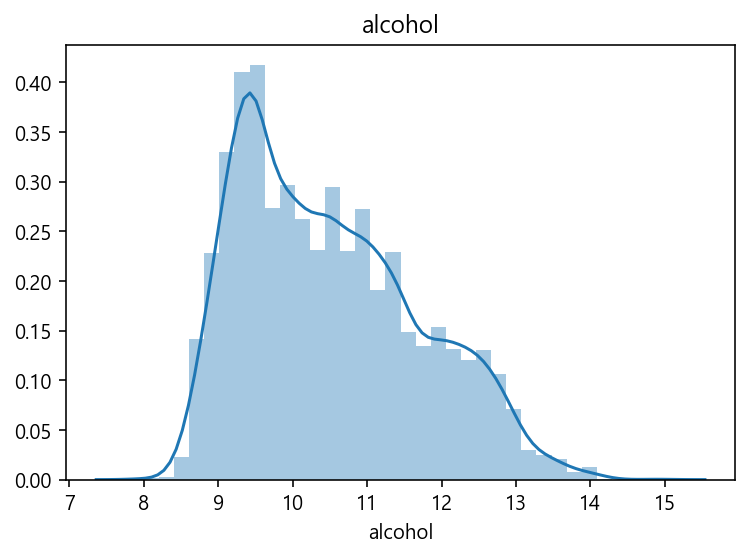

In [50]:
for col in train.columns[2:-1]:
    sns.distplot(train.loc[train[col].notnull(), col], hist=True ) #hist = False하면 히스토그램안나옴
    plt.title(col)
    plt.show()

## 등급별 각 특성 평균

In [51]:
qualitymean=train.groupby('quality').mean()

In [52]:
qualitymean

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,,
3,2847.730769,7.811538,0.538077,0.266923,5.203846,0.076500,40.096154,121.461538,0.995713,3.250385,0.500000,10.251923
4,2692.709677,7.269892,0.447285,0.280323,4.145430,0.059247,20.553763,104.811828,0.994730,3.228602,0.500484,10.180376
5,2762.370805,7.329195,0.387855,0.308043,5.792422,0.064417,30.174217,120.370805,0.995843,3.213384,0.525017,9.846875
6,2741.139901,7.166743,0.312301,0.323411,5.535141,0.053932,30.969578,115.357616,0.994527,3.219611,0.532686,10.606015
7,2794.899351,7.123972,0.289724,0.332987,4.748918,0.045352,30.457251,108.178571,0.993122,3.228333,0.546786,11.383864
8,2466.427632,6.839474,0.292730,0.330263,5.581579,0.041105,34.585526,119.421053,0.992544,3.216711,0.506184,11.680921
9,2354.800000,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


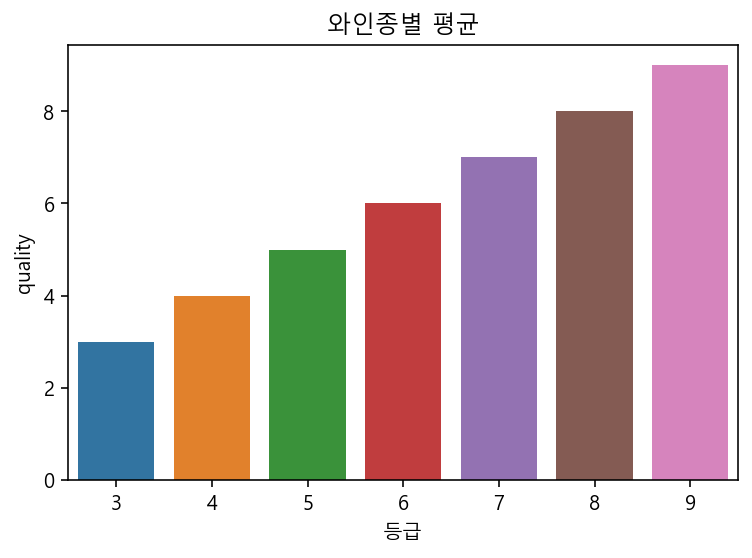

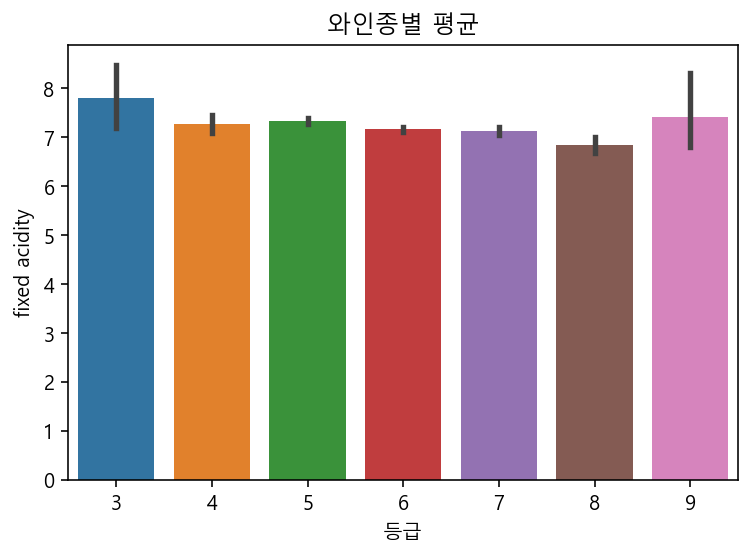

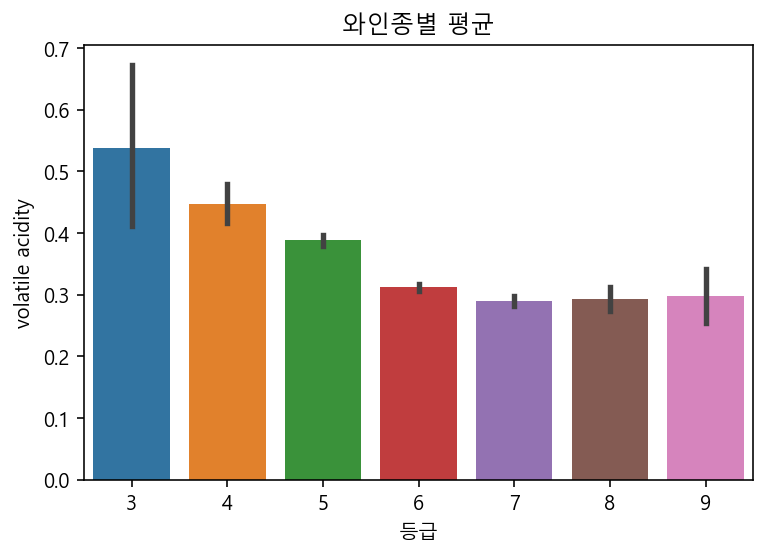

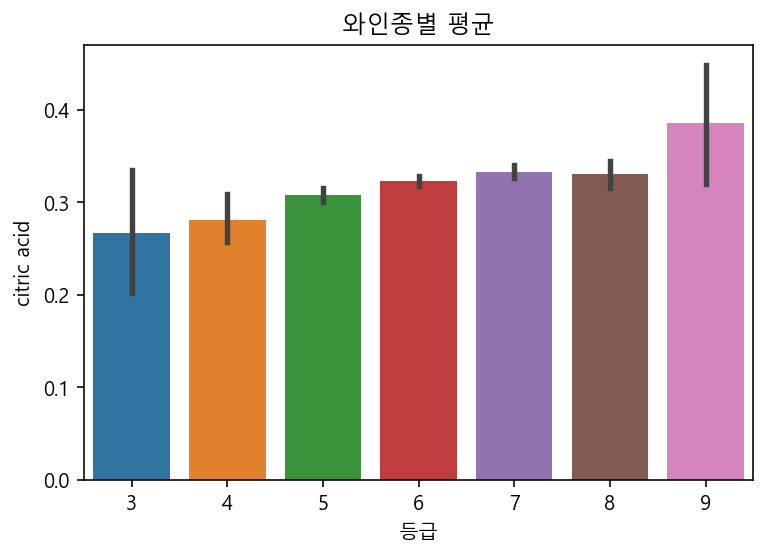

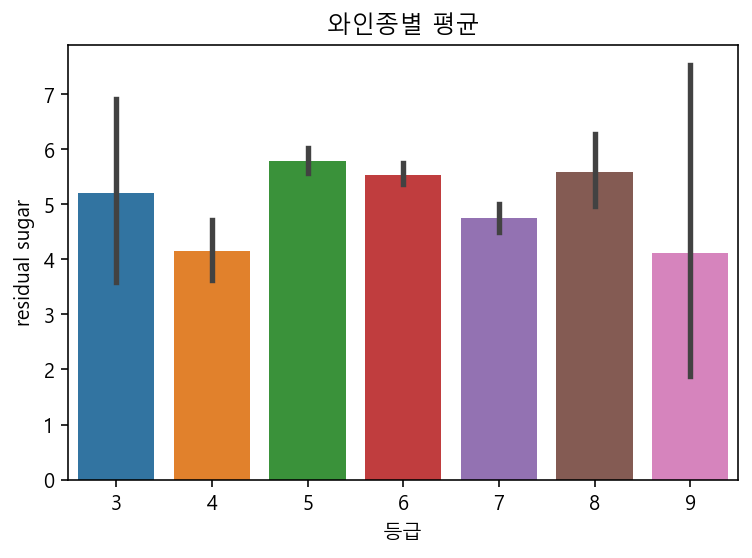

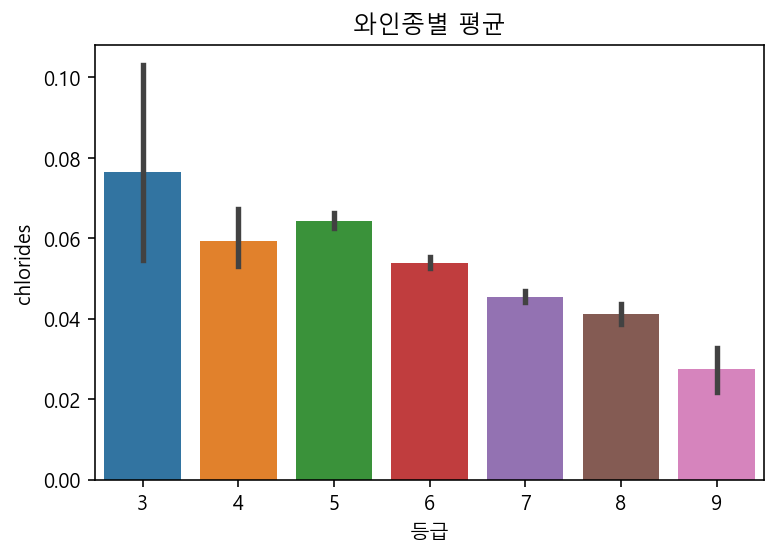

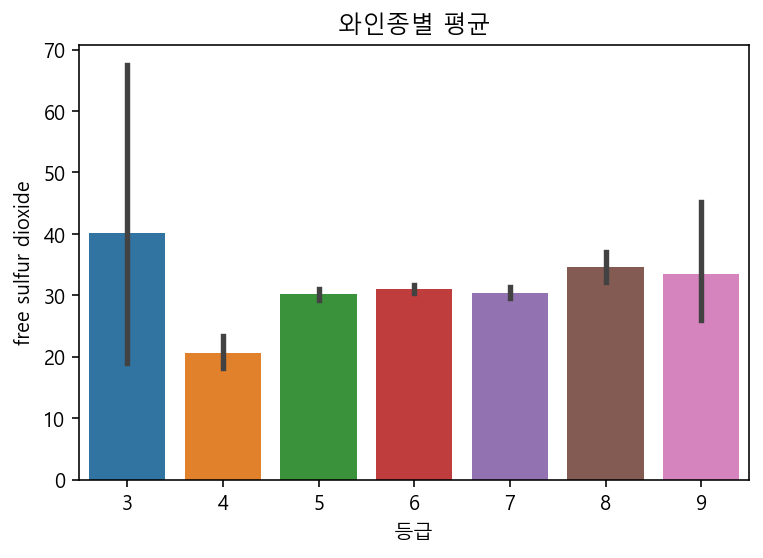

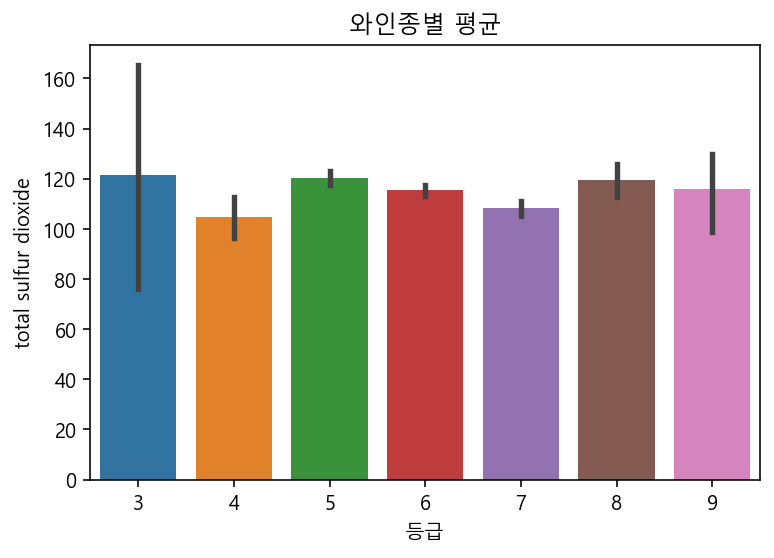

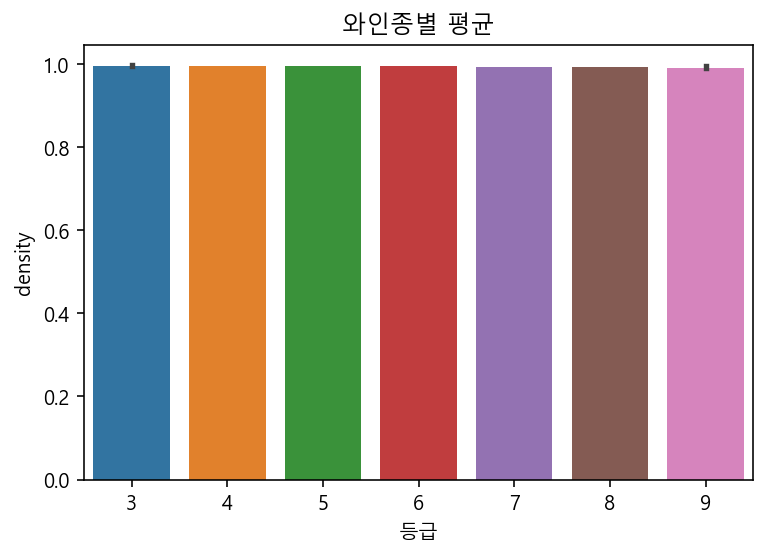

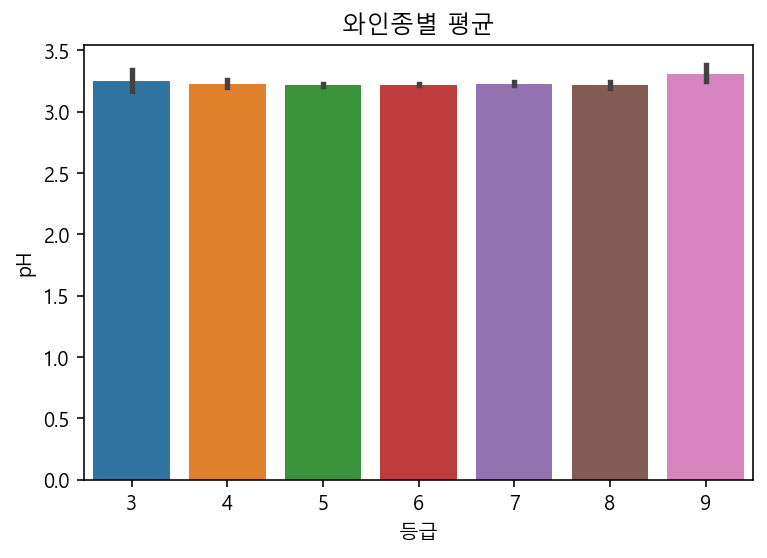

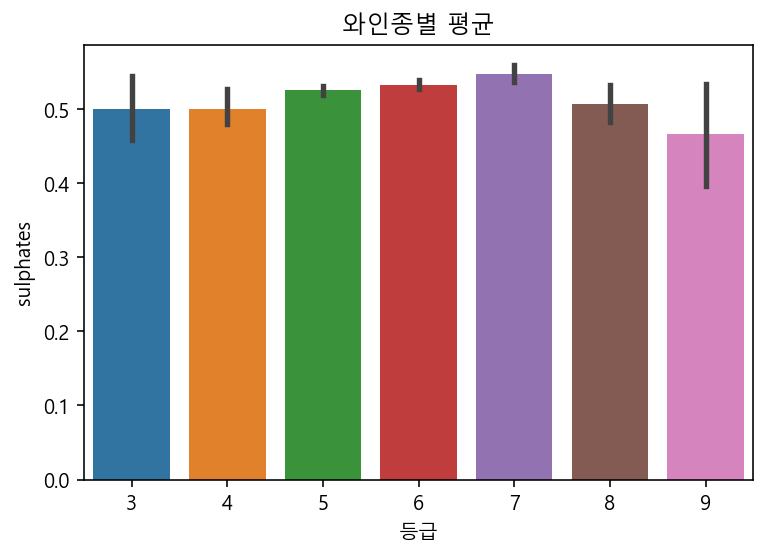

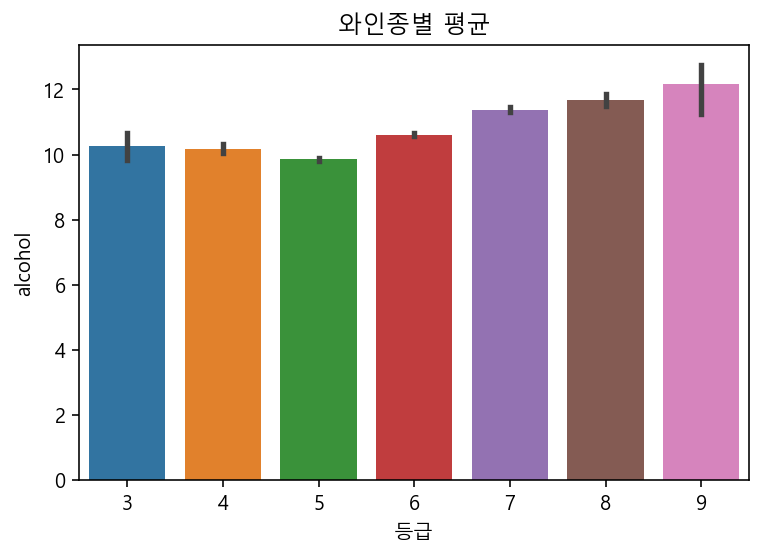

In [53]:
for col1 in train.columns[1:-1]:
    ax = plt.subplots()
    ax = sns.barplot(x='quality',y=col1, data=train)
    ax.set_title('와인종별 평균')
    ax.set_xlabel('등급')
    ax.set_ylabel(col1)

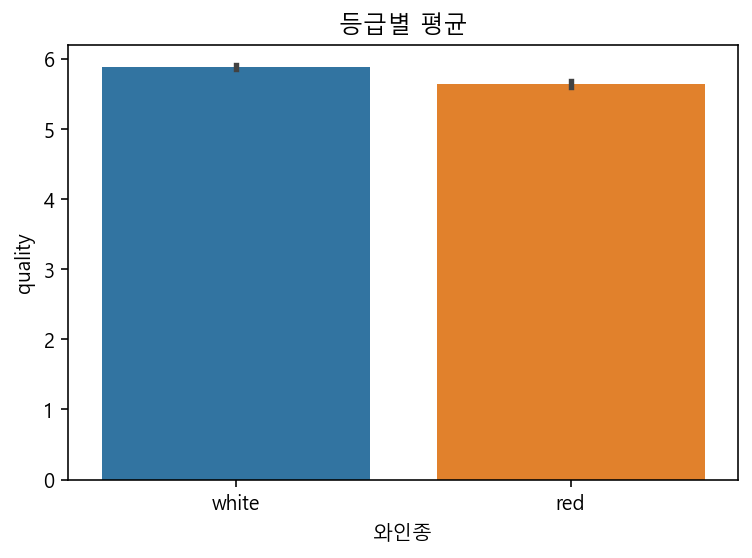

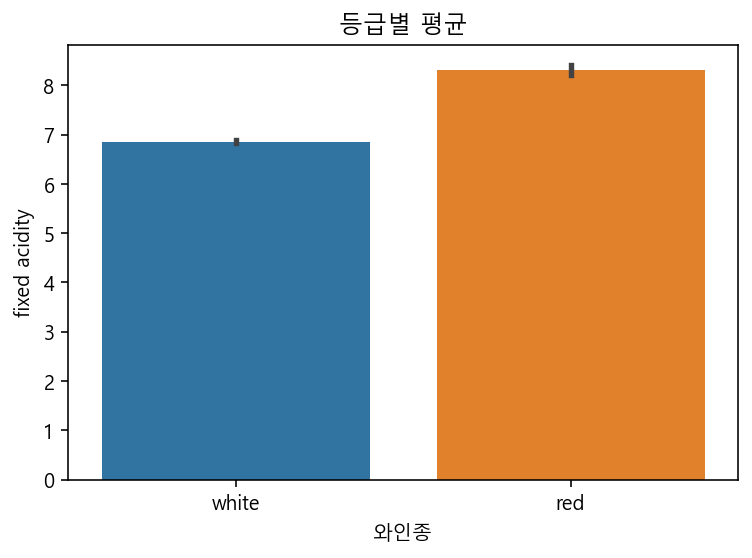

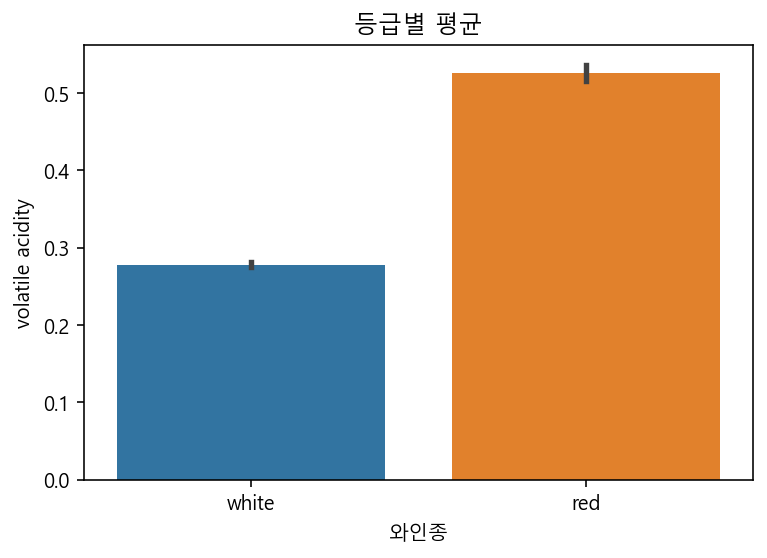

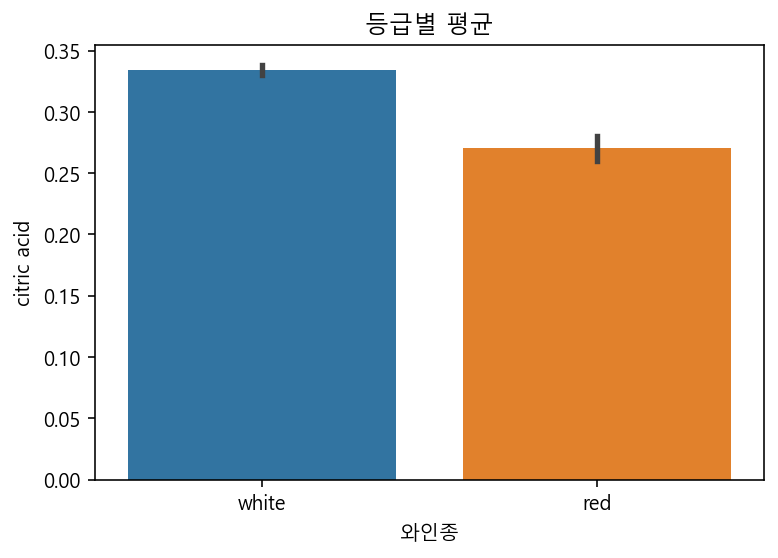

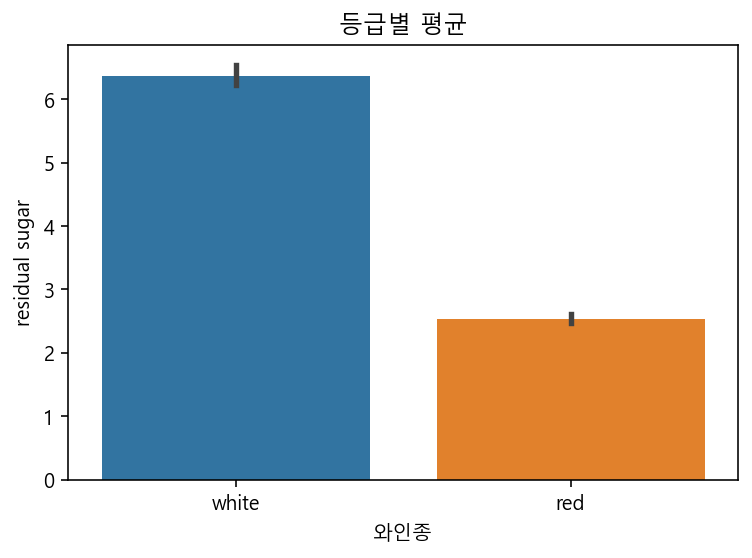

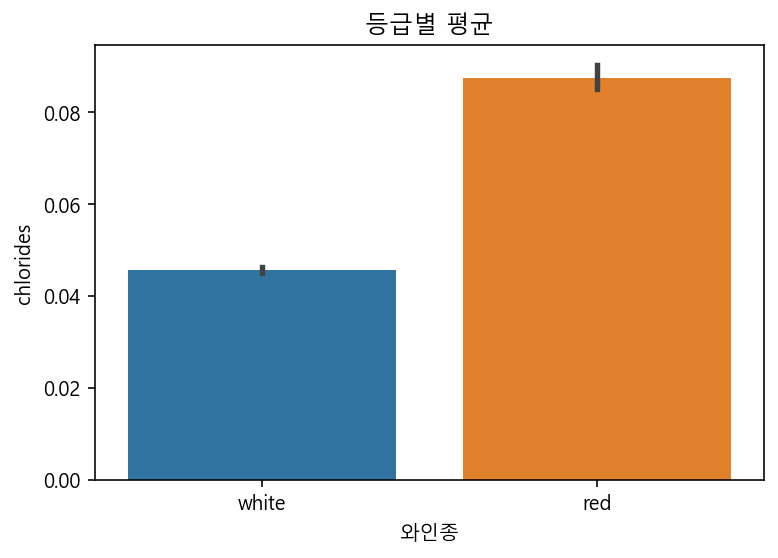

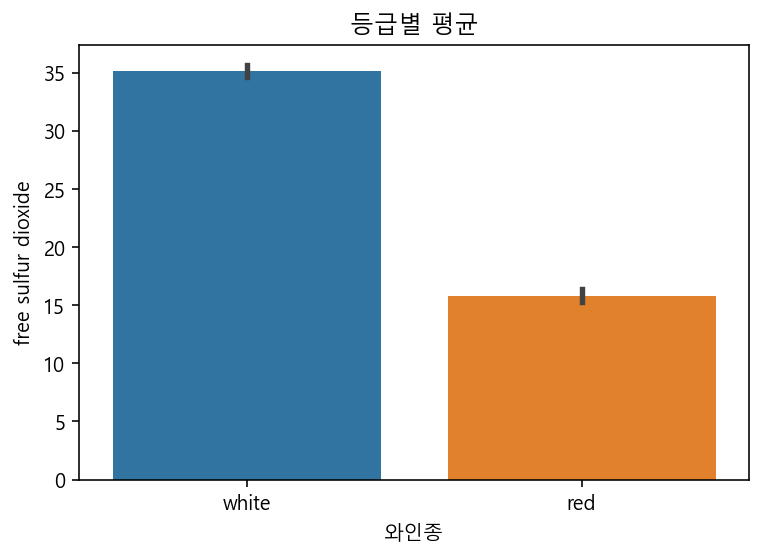

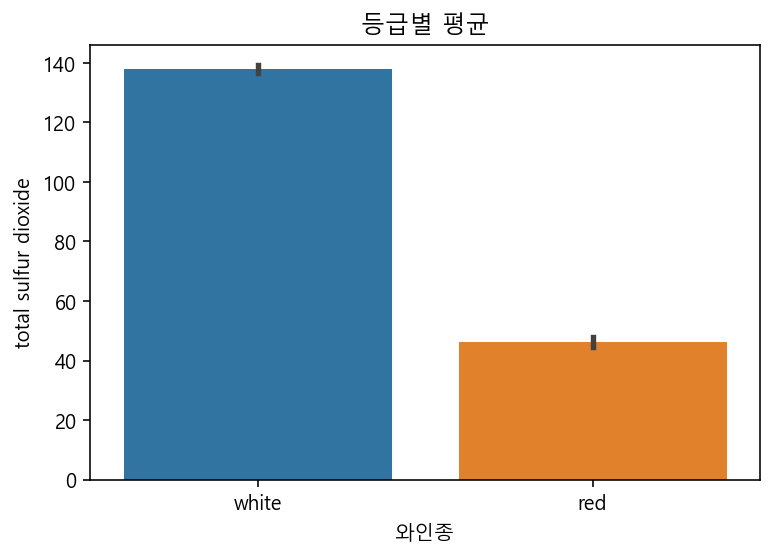

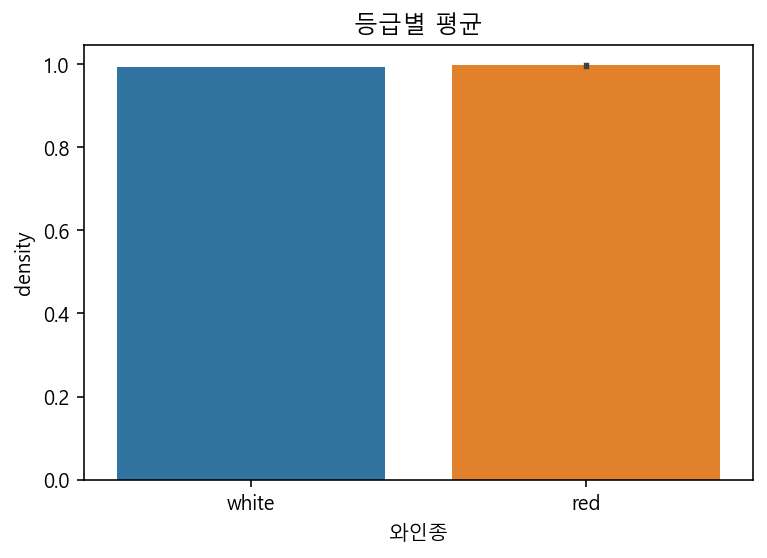

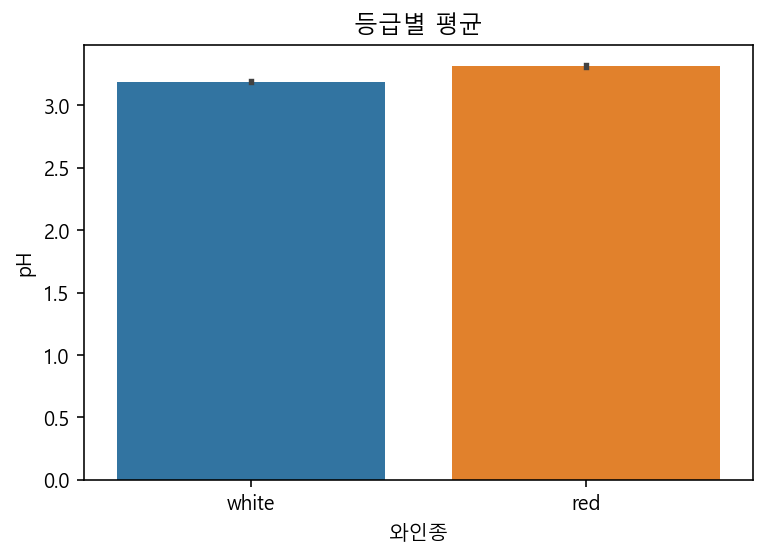

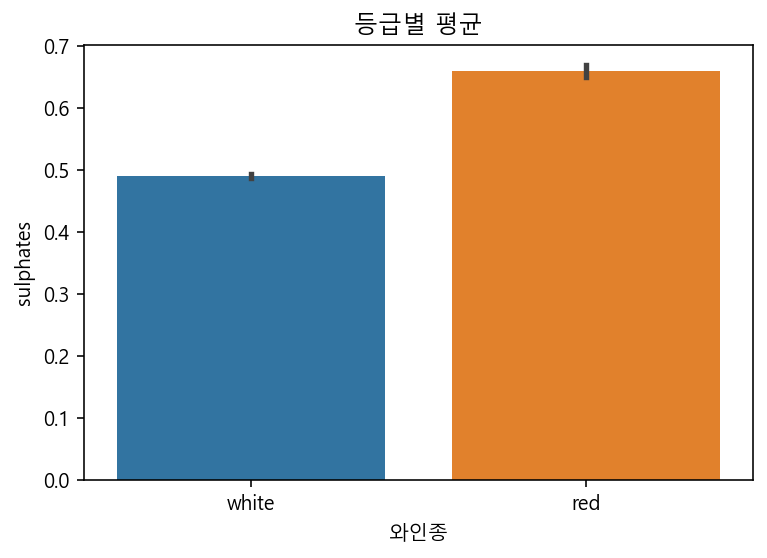

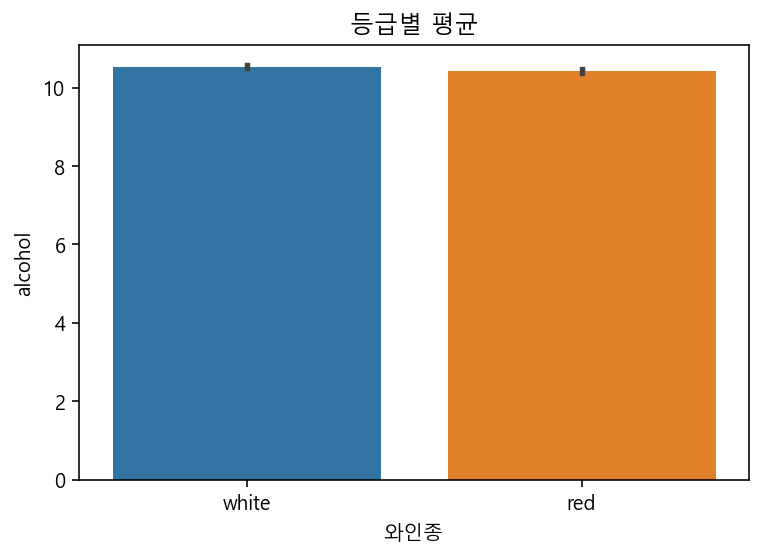

In [54]:
for col1 in train.columns[1:-1]:
    ax = plt.subplots()
    ax = sns.barplot(x='type',y=col1, data=train)
    ax.set_title('등급별 평균')
    ax.set_xlabel('와인종')
    ax.set_ylabel(col1)

In [55]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


## 와인 종별로 품질은 어떠할까 ?

In [56]:
pd.crosstab(train.quality,train.type, margins=True)

type,red,white,All
quality,,,
3,9,17,26
4,41,145,186
5,571,1217,1788
6,535,1881,2416
7,169,755,924
8,13,139,152
9,0,5,5
All,1338,4159,5497


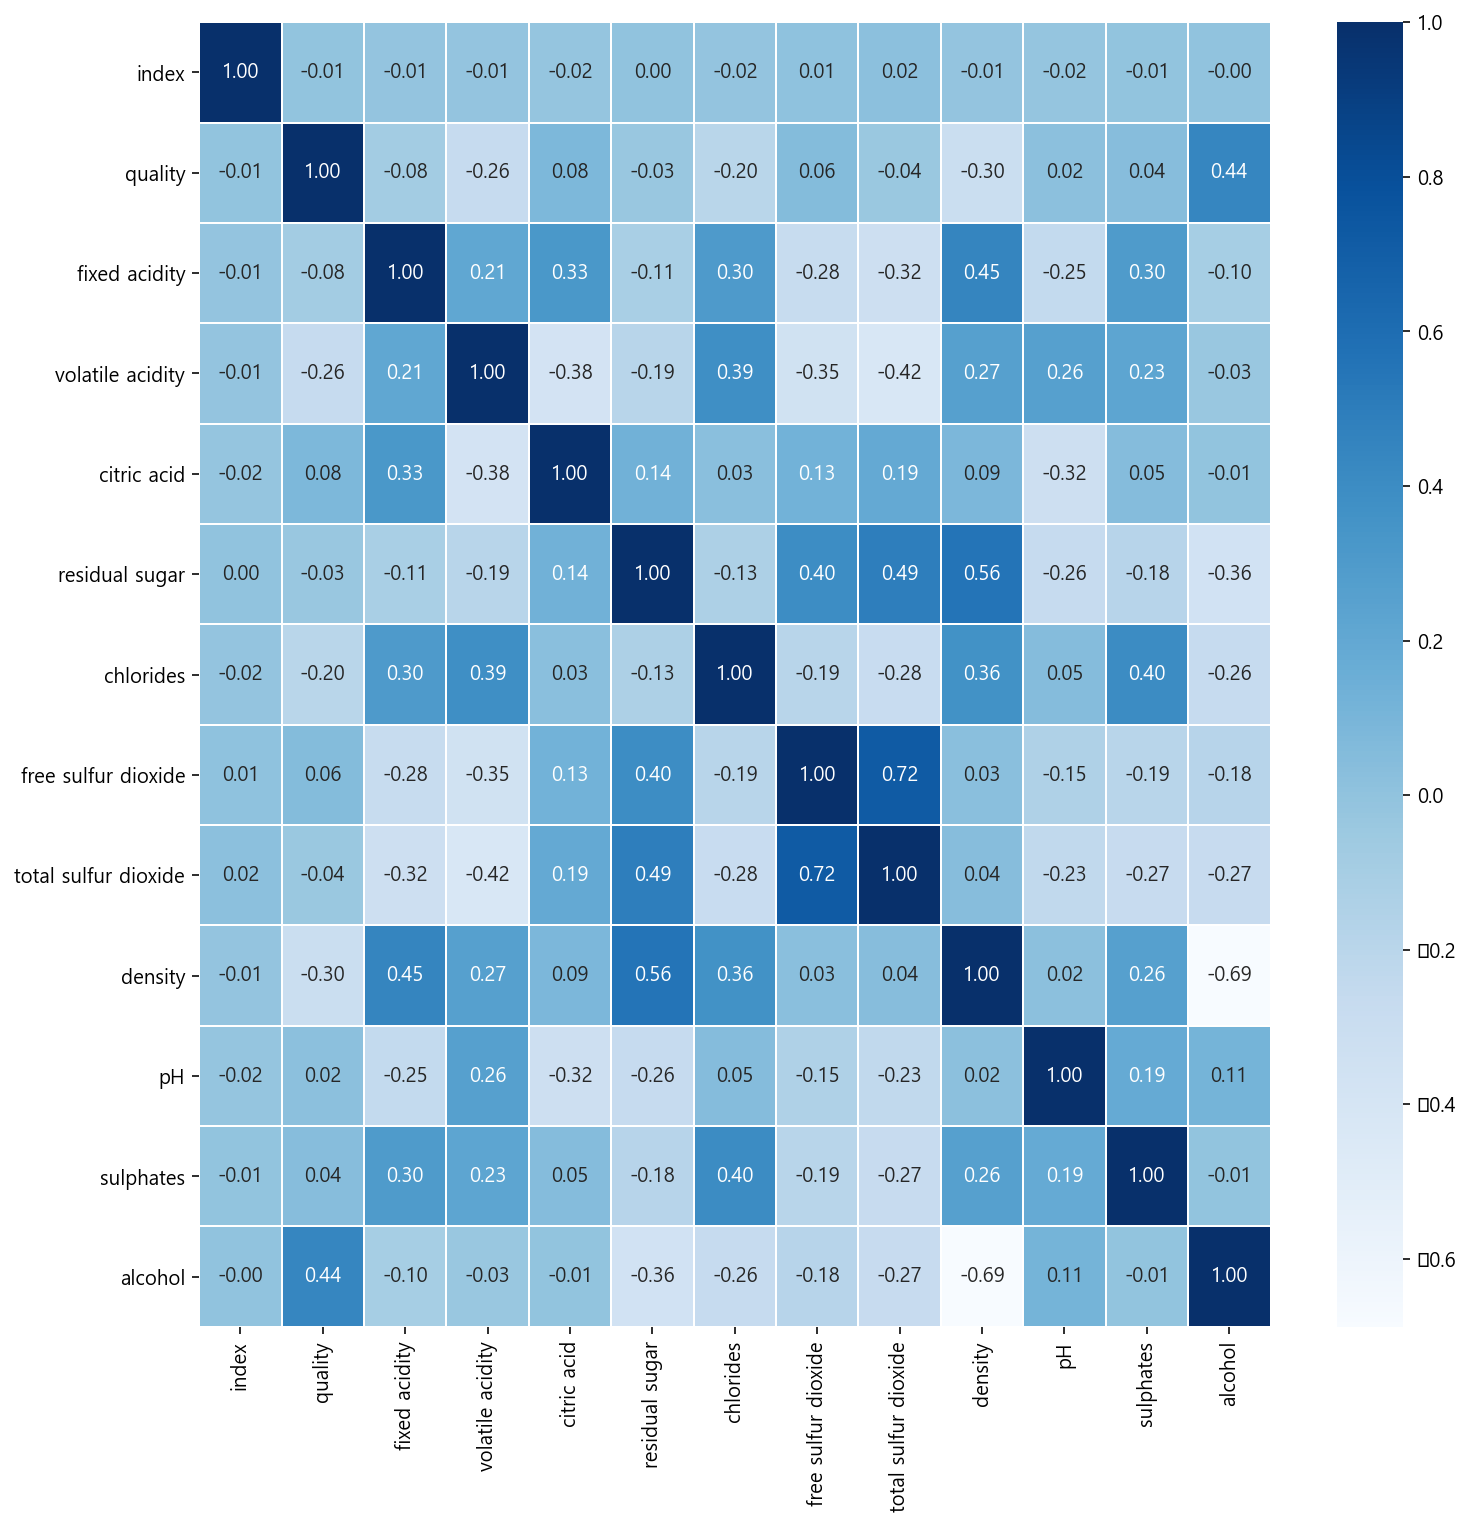

In [57]:
plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

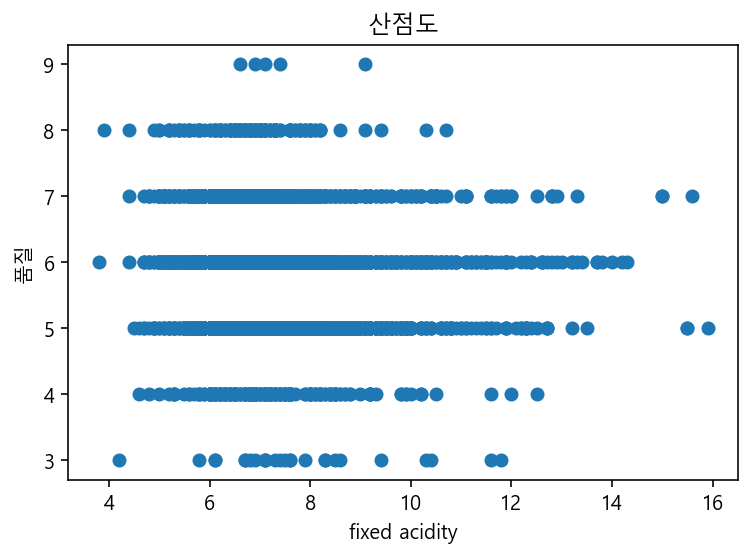

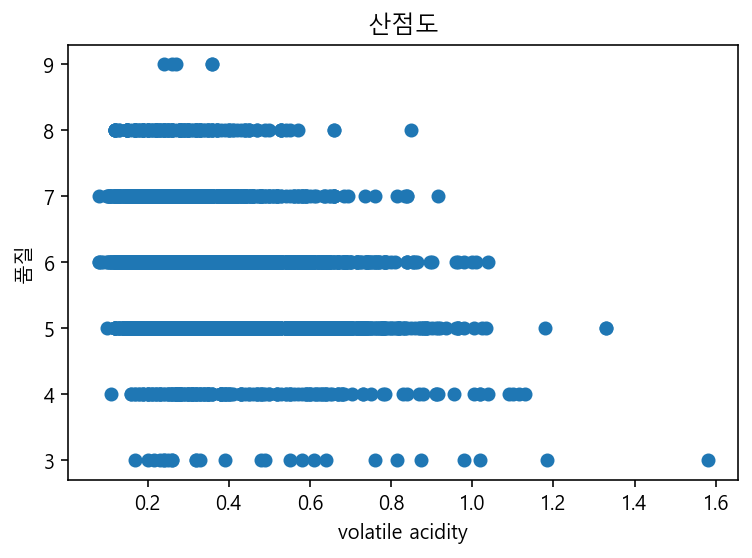

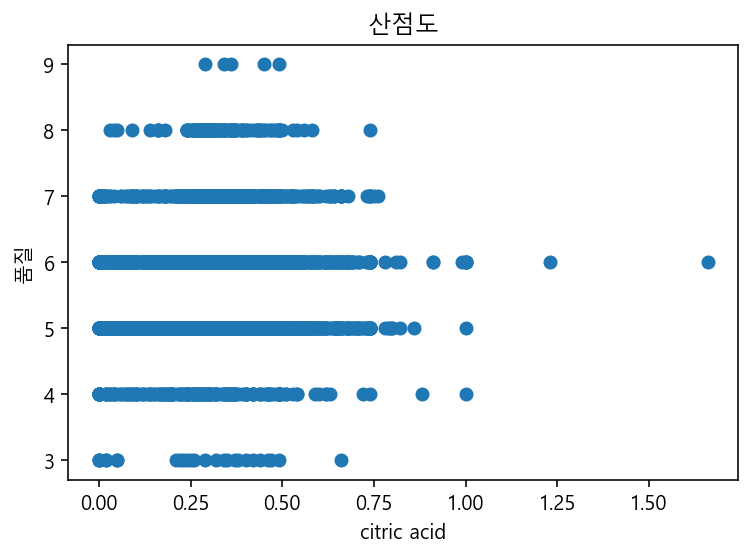

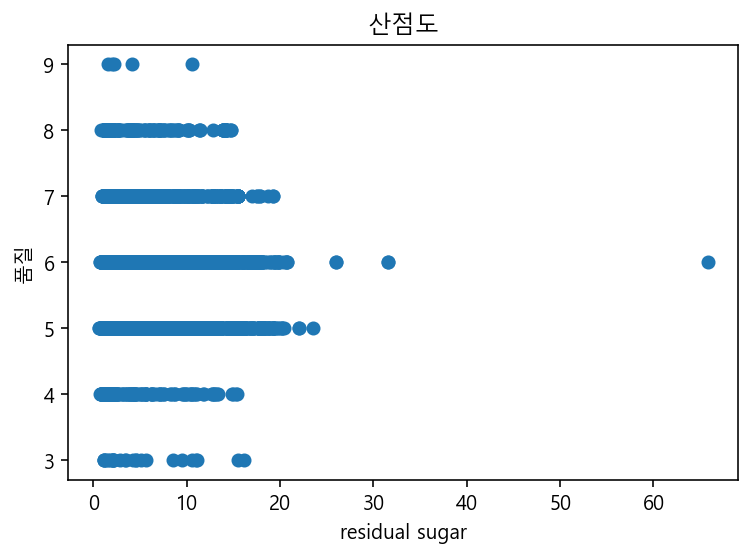

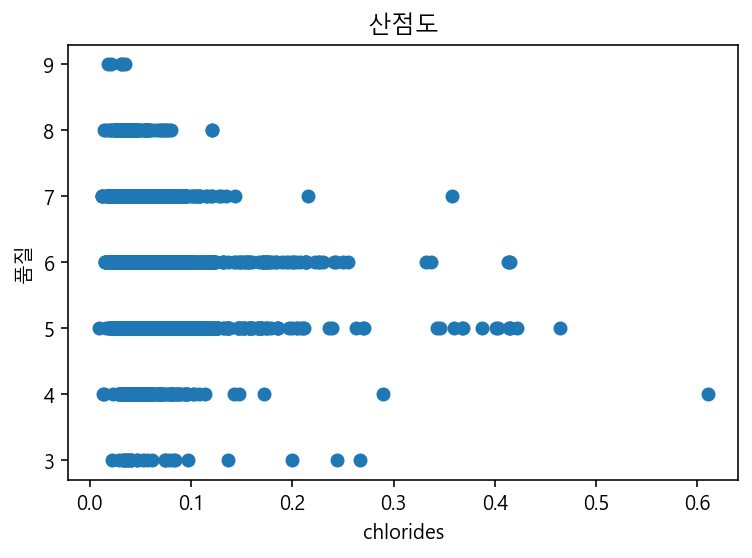

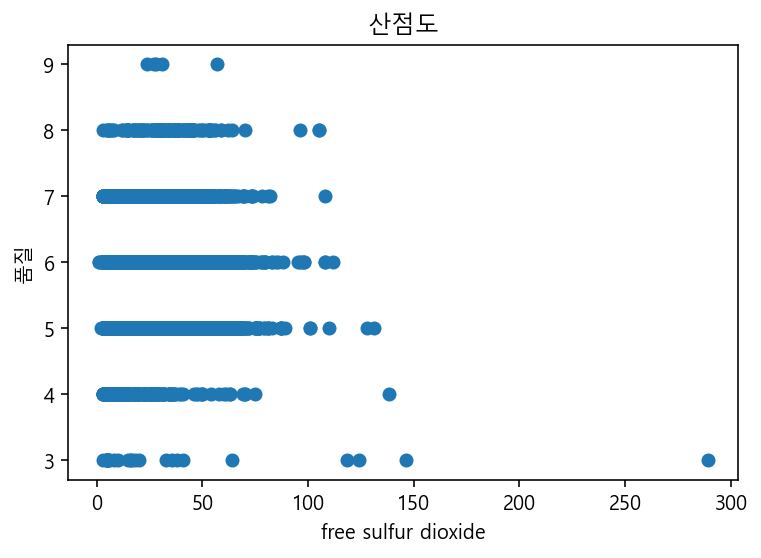

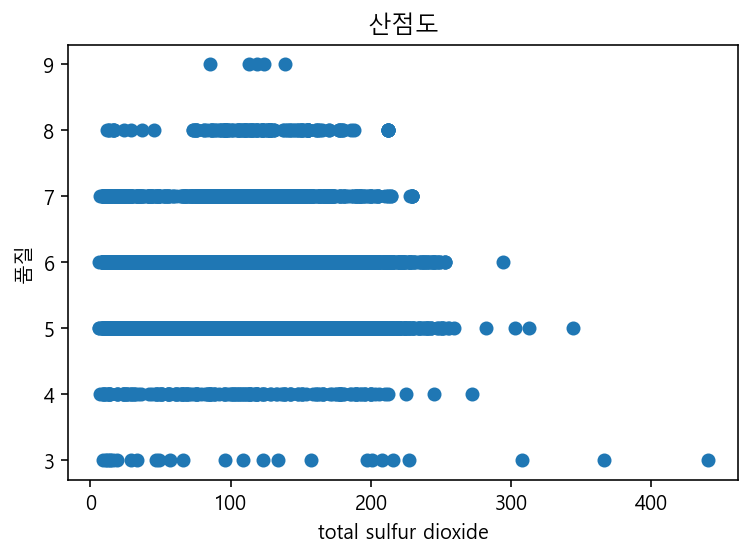

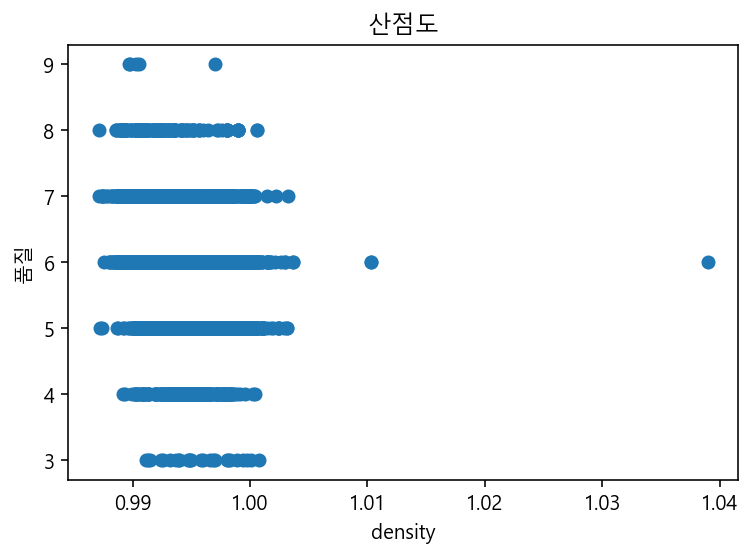

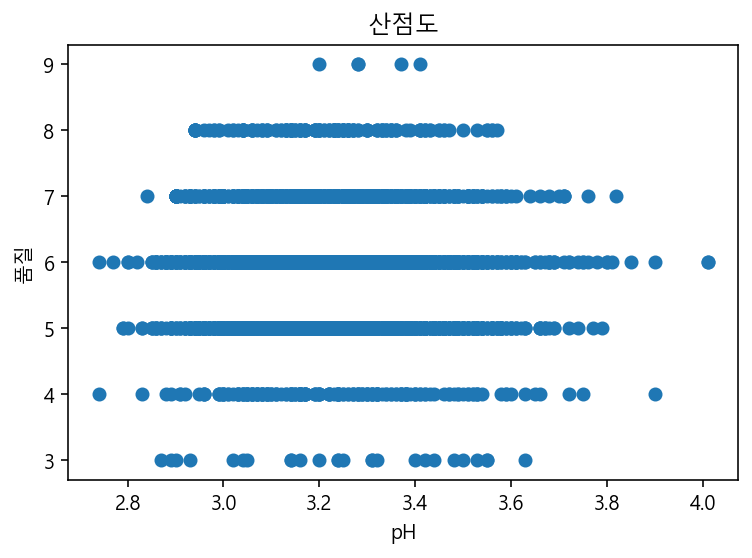

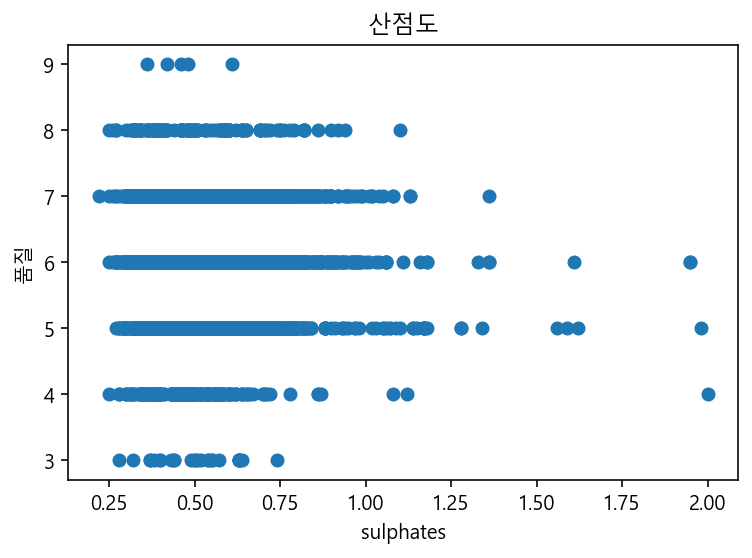

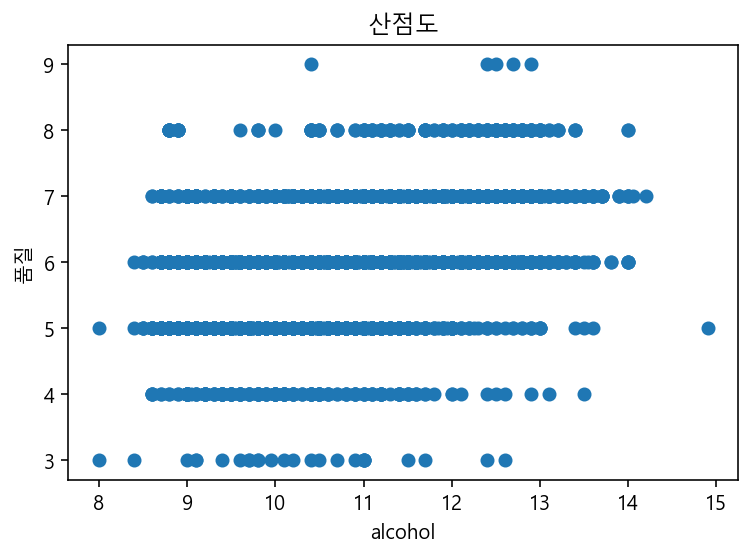

In [58]:
for col1 in train.columns[2:-1]:
    scatter_plot = plt.figure()
    axes1 = scatter_plot.add_subplot(1,1,1)
    axes1.scatter(train[col1], train['quality'])
    axes1.set_title('산점도')
    axes1.set_xlabel(col1)
    axes1.set_ylabel('품질')

In [101]:
X_train = train.iloc[:,2:]
y_train = train.iloc[:,1]
y_train=y_train.to_frame()

In [102]:
y_train['quality']=y_train['quality'].astype(str)
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   quality  5497 non-null   object
dtypes: object(1)
memory usage: 43.1+ KB


In [103]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [127]:
X_test = test.iloc[:,1:]
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,red
996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,white
997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,red
998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,red


In [128]:
X_train=X_train.replace('white','1')
X_train=X_train.replace('red','2')
X_test= X_test.replace('white','1')
X_test= X_test.replace('red','2')

In [129]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
testpred=tree.predict(X_test)
print(testpred)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))


['6' '6' '6' '5' '6' '5' '6' '7' '6' '7' '6' '6' '7' '7' '6' '5' '6' '6'
 '6' '6' '6' '6' '5' '7' '6' '6' '5' '5' '6' '6' '7' '7' '5' '5' '6' '6'
 '5' '5' '6' '6' '7' '5' '8' '6' '6' '7' '5' '6' '4' '6' '5' '5' '6' '4'
 '5' '5' '6' '7' '5' '7' '5' '6' '5' '4' '5' '6' '5' '5' '6' '5' '5' '5'
 '5' '6' '7' '5' '4' '6' '6' '7' '7' '6' '5' '5' '6' '6' '5' '5' '6' '7'
 '6' '6' '6' '6' '6' '7' '6' '6' '6' '6' '6' '6' '6' '4' '5' '6' '6' '6'
 '7' '5' '6' '6' '6' '5' '5' '7' '6' '7' '6' '6' '8' '5' '6' '7' '6' '5'
 '6' '6' '6' '7' '4' '5' '6' '5' '5' '8' '6' '7' '6' '6' '5' '6' '5' '5'
 '5' '5' '7' '6' '6' '7' '5' '8' '6' '5' '5' '5' '6' '5' '6' '3' '5' '6'
 '6' '7' '6' '5' '4' '6' '6' '5' '5' '5' '6' '5' '6' '6' '6' '5' '5' '5'
 '5' '6' '7' '6' '5' '8' '6' '6' '5' '7' '6' '5' '5' '6' '6' '5' '7' '5'
 '5' '5' '6' '6' '6' '5' '6' '5' '6' '6' '6' '6' '7' '5' '5' '7' '7' '5'
 '7' '6' '7' '7' '7' '5' '6' '6' '7' '6' '6' '5' '6' '5' '7' '7' '7' '5'
 '6' '6' '6' '6' '6' '7' '6' '6' '6' '7' '7' '6' '6

In [143]:
testpred=pd.DataFrame(testpred)
# testpred.columns=['quality']
# testpred['index']=testpred.index
# testpred.set_index('index',inplace=True)
testpred

,quality
index,
0,6
1,6
2,6
3,5
4,6
...,...
995,6
996,5
997,6


In [144]:
testpred.to_csv("wine_result.csv")